# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading Data

In [35]:
df = pd.read_csv('customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [36]:
df.shape

(100000, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# so looking at the data we can say there is no null value 

In [38]:
df.notnull().sum()

CustomerID                    100000
Name                          100000
Age                           100000
Gender                        100000
Location                      100000
Subscription_Length_Months    100000
Monthly_Bill                  100000
Total_Usage_GB                100000
Churn                         100000
dtype: int64

In [39]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# Find numerical and categorical 

In [40]:
num_cols = list(df.select_dtypes(exclude='object').columns)
num_cols

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [41]:
cat_cols = list(df.select_dtypes(include='object').columns)
cat_cols

['Name', 'Gender', 'Location']

# now fetching columns information

In [42]:
#Gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [43]:
df['Gender'].value_counts()                  #we can see there are 50k female and 49k male 

Female    50216
Male      49784
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

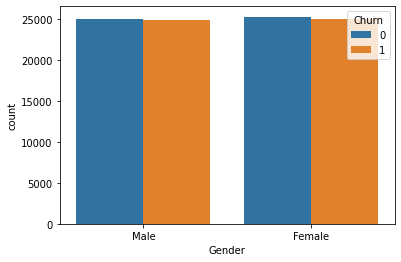

In [44]:
sb.countplot(data=df, x='Gender', hue='Churn')

In [45]:
#Location Column
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [46]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

<AxesSubplot: xlabel='Location', ylabel='count'>

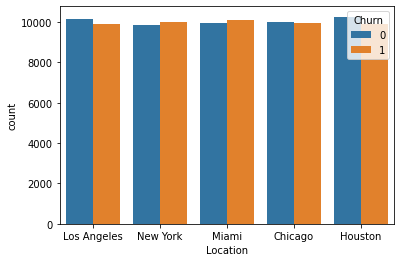

In [47]:
sb.countplot(data=df, x='Location', hue='Churn')

In [48]:
#Subscription_Length_Months column
df['Subscription_Length_Months'].unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21], dtype=int64)

In [49]:
df['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

<AxesSubplot: xlabel='Subscription_Length_Months', ylabel='Count'>

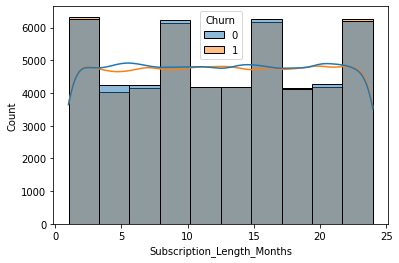

In [50]:
sb.histplot(data=df,x='Subscription_Length_Months',bins=10,kde=True,hue='Churn')

(array([12611.,  8269.,  8395., 12391.,  8355.,  8367., 12415.,  8277.,
         8457., 12463.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

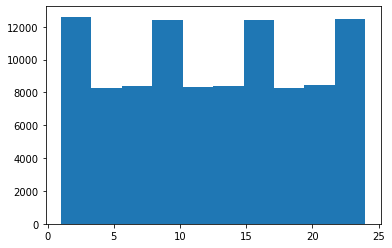

In [51]:
plt.hist(df['Subscription_Length_Months'],bins=10)

In [52]:
df.notnull().sum()

CustomerID                    100000
Name                          100000
Age                           100000
Gender                        100000
Location                      100000
Subscription_Length_Months    100000
Monthly_Bill                  100000
Total_Usage_GB                100000
Churn                         100000
dtype: int64

# feature encoding

# lets handle categorical columns / we can also OneHotEncoding

In [53]:
# Gender column
def hand_Gender(g):
    if g == 'Male':
        return 0
    else:
        return 1

In [54]:
df['Gender'] = df['Gender'].apply(hand_Gender)
df['Gender']

0        0
1        1
2        1
3        1
4        1
        ..
99995    0
99996    1
99997    0
99998    1
99999    1
Name: Gender, Length: 100000, dtype: int64

In [55]:
#location column
def hand_location(L):
    if L == 'Los Angeles':
        return 0
    elif L ==  'New York':
        return 1
    elif L == 'Miami':
        return 2
    elif L == 'Chicago':
        return 3
    else:
        return 4
    

In [56]:
df['Location'] = df['Location'].apply(hand_location)
df['Location']

0        0
1        1
2        0
3        2
4        2
        ..
99995    4
99996    1
99997    3
99998    1
99999    0
Name: Location, Length: 100000, dtype: int64

In [57]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,0,17,73.36,236,0
1,2,Customer_2,62,1,1,1,48.76,172,0
2,3,Customer_3,24,1,0,5,85.47,460,0
3,4,Customer_4,36,1,2,3,97.94,297,1
4,5,Customer_5,46,1,2,19,58.14,266,0


In [58]:
df=df.drop(['Name'],axis=1)
df=df.drop(['CustomerID'],axis=1)

In [59]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,0,0,17,73.36,236,0
1,62,1,1,1,48.76,172,0
2,24,1,0,5,85.47,460,0
3,36,1,2,3,97.94,297,1
4,46,1,2,19,58.14,266,0


In [60]:
final_cols = list(df.columns)

# Feature selection by correlation

In [61]:
df.corr()['Churn']

Age                           0.001559
Gender                       -0.002121
Location                     -0.002594
Subscription_Length_Months    0.002328
Monthly_Bill                 -0.000211
Total_Usage_GB               -0.002842
Churn                         1.000000
Name: Churn, dtype: float64

# scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [63]:
#Scaler = MinMaxScaler()

In [64]:
#Scaler.fit(df[final_cols])

In [65]:
#df_scale = Scaler.transform(df[final_cols])
#df_scale

In [66]:
s_scaler = StandardScaler()

In [67]:
s_scaler.fit(df)

StandardScaler()

In [69]:
x_s = s_scaler.transform(df)

In [70]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,0,0,17,73.36,236,0
1,62,1,1,1,48.76,172,0
2,24,1,0,5,85.47,460,0
3,36,1,2,3,97.94,297,1
4,46,1,2,19,58.14,266,0


# Finding dependent and independent column

In [71]:
X = df[df.columns[:-1:]]
y = df['Churn']

# Dividing data into training and testing part

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=17)

# Model building

In [73]:
# Model building by Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.00011849376168826531

In [74]:
#Model building by Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4998

In [42]:
# Model building by KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.50456

In [43]:
# Model building by DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4998

In [44]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.49556

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [46]:
dict1 = {'min_samples_leaf' : [2,3,4,5],
         'max_depth' : [2,3,4,5]} 

In [47]:
grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=dict1, cv=5, verbose=2)
grid_cv.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]},
             verbose=2)

In [48]:
grid_cv.best_score_

0.5041

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [50]:
dict1={'n_estimators':[75,100,150,200],
       'max_depth':[6,7,8],
       'min_samples_leaf':[2,3,4],
       'min_samples_split':[2,3,4]}

In [51]:
grid_cv = GridSearchCV(RandomForestClassifier(random_state=17), param_grid=dict1,cv=5,verbose=3)

In [52]:
grid_cv.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.510 total time=   2.5s
[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.502 total time=   2.4s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.500 total time=   2.6s
[CV 4/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.498 total time=   2.4s
[CV 5/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.505 total time=   2.5s
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.510 total time=   3.4s
[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.504 total time=   3.3s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.500 total time=   3.4s
[CV 4/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 150, 200]},
             verbose=3)

In [53]:
grid_cv.best_score_

0.50491